In [ ]:
#DESCRIPTION

#This program helps project planners estimate project timelines and evaluate risks by modelling 
#project outcomes using Monte Carlo methods. Given a set of project tasks, each with an associated time estimate
#and attached confidence level, the program relies on repeated random sampling to obtain probabilistic and cumulative
#distribution functions. With this output, project planners and teams have more information about the risks associated 
#with different project timelines than they would get from a simple, single-value target timeline. 

#The program could be extended in a number of ways in the future: modelling outcomes for a given discipline,
#modelling outcomes of sequential  disciplines, error correction of individuals' overestimation/underestimation
#tendencies based on previous performance, etc.


In [1]:
import csv as csv
import pandas as pd
import numpy as np
import scipy.stats as stats


In [2]:
csv_file_object = csv.reader(open('sample_project_estimates.csv', 'rU')) 
header = csv_file_object.next() 
data=[] 

for row in csv_file_object:
    data.append(row)
data = np.array(data)

df = pd.read_csv('sample_project_estimates.csv', header=0)
df['comb'] = df['estimate (hours)'] * df['confidence']
df

,task number,discipline,task type,estimator,estimate (hours),confidence,comb
0,1,ux,wireframe,jess,10,0.7,7.0
1,2,ux,ux documentation,jess,5,0.9,4.5
2,3,front,setup,jason,3,0.9,2.7
3,4,front,build,jason,20,0.6,12.0
4,5,back,server map,tony,20,0.5,10.0
5,6,back,integration,tony,10,0.6,6.0
6,7,ui,styleguide,aaron,6,0.9,5.4
7,8,ui,designs,aaron,20,0.8,16.0
8,9,pm,project plan,nick,4,0.8,3.2
9,10,pm,check ups,nick,20,1.0,20.0


In [3]:
#Import inline plots
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
#We need our confidence about an estimate to appropriately scale the probability 
#distribution to "narrow" for high-confidence estimates and "widen" for low-confidence estimates

#We'll use a normal distribution and convert the confidence ([0,1] interval) into standard deviation

#I think 10% confidence should give us about scale=9 (scale is a parameter of numpy.random.normal realted 
#to standard distribution), and confidence of 90% should give us scale=1. Solving the 
#system of equations will give a linear function.

alpha = np.matrix([[.1, 1],[.9, 1]])
beta = np.matrix([[9],[1]])

slopeandintercept = np.linalg.solve(alpha, beta)
print "slope is %d" % slopeandintercept[0]
print "intercept is %d" % slopeandintercept[1]

#10(x-1)^2 gets us a curve with similar output but we'll stick with a linear function for now

slope is -10
intercept is 10


In [7]:
#Converts confidence to a scaling factor for a normal distribution. Added .01 to the intercept to keep confidence 
#levels of 100% (1.0) above zero. 
def confidence_to_scale(confidence):
    return -10 * confidence + 10.01

#Takes an estimate, confidence level, integer and returns a normal distribution with mean at the estimate, 
#confidence level correlated to distribution scale, and a number of values sampled from that 
#distribution equal to parameter "size"
def computepdf(estimate, confidence, size):
    return np.random.normal(loc=estimate, scale = confidence_to_scale(confidence), size = size)

#Computes probability density function for all tasks in the data, samples once from each 
#distribution, and sums the samples to give a sample total project duration
def singleproject(data):
    sampleduration = 0
    for i in range(len(data)):
        sampleduration += computepdf(data[i,4], float(data[i,5]), 1)
    return sampleduration
    
#Returns a list of sample total project durations 
def multisimul(number):
    simularray = []
    for i in range(number):
        simularray.append(singleproject(data))
    result = [item for sublist in simularray for item in sublist]
    result = [int(round(n, 0)) for n in result]
    return result
    
#Plots the probability distribution and cumulative distribution     
def plotpdfcdf(number):
    result = multisimul(number)
    plt.hist(result, 30, normed=1, histtype='step', cumulative=False)
    plt.hist(result, 30, normed=1, histtype='step', cumulative=True)

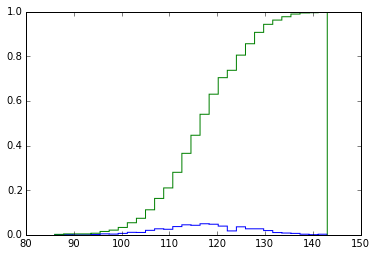

In [6]:
plotpdfcdf(1000)